In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/diabetes.csv")

print("SHAPE:", df.shape)
print("\n--- df.info() ---")
print(df.info())

print("\n--- df.describe() ---")
print(df.describe())

print("\n--- Outcome value counts ---")
print(df['Outcome'].value_counts())


SHAPE: (768, 9)

--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

--- df.describe() ---
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.8

In [2]:
columns_with_zero = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI"
]

for col in columns_with_zero:
    print(col, ":", (df[col] == 0).sum())


Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11


In [3]:
import numpy as np

df[columns_with_zero] = df[columns_with_zero].replace(0, np.nan)


In [4]:
for col in columns_with_zero:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\princ\AppData\Local\Temp\ipykernel_3016\2324456876.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [5]:
df[columns_with_zero].isnull().sum()


Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [6]:
df.to_csv("../data/processed/diabetes_clean.csv", index=False)


In [7]:
import pandas as pd

df = pd.read_csv("../data/processed/diabetes_clean.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [9]:
df['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

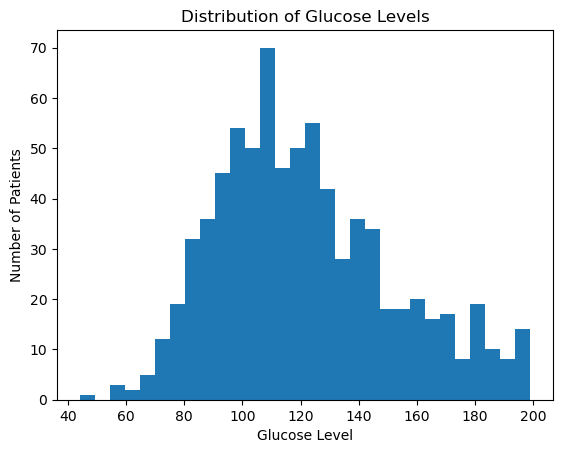

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['Glucose'], bins=30)
plt.xlabel("Glucose Level")
plt.ylabel("Number of Patients")
plt.title("Distribution of Glucose Levels")
plt.show()


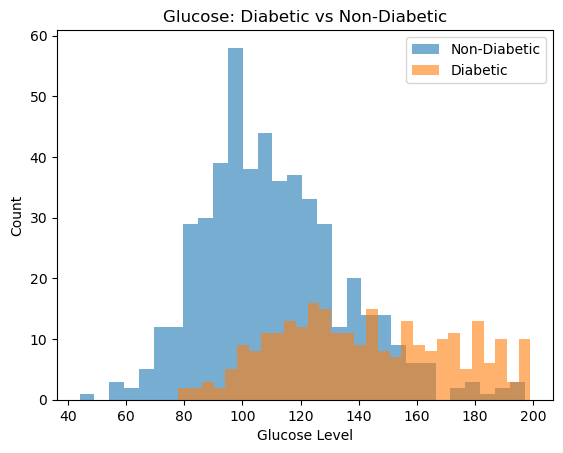

In [11]:
plt.hist(df[df['Outcome'] == 0]['Glucose'], bins=30, alpha=0.6, label="Non-Diabetic")
plt.hist(df[df['Outcome'] == 1]['Glucose'], bins=30, alpha=0.6, label="Diabetic")

plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.title("Glucose: Diabetic vs Non-Diabetic")
plt.legend()
plt.show()


In [12]:
df[df['Outcome'] == 0]['Glucose']


1       85.0
3       89.0
5      116.0
7      115.0
10     110.0
       ...  
762     89.0
763    101.0
764    122.0
765    121.0
767     93.0
Name: Glucose, Length: 500, dtype: float64

In [13]:
df[df['Outcome'] == 1]['Glucose']


0      148.0
2      183.0
4      137.0
6       78.0
8      197.0
       ...  
755    128.0
757    123.0
759    190.0
761    170.0
766    126.0
Name: Glucose, Length: 268, dtype: float64

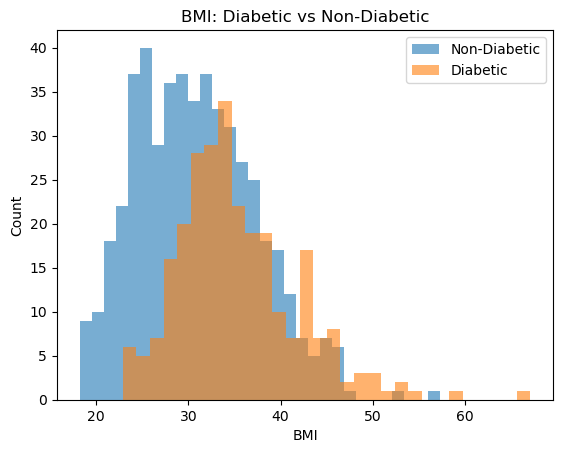

In [14]:
plt.hist(df[df['Outcome'] == 0]['BMI'], bins=30, alpha=0.6, label="Non-Diabetic")
plt.hist(df[df['Outcome'] == 1]['BMI'], bins=30, alpha=0.6, label="Diabetic")

plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI: Diabetic vs Non-Diabetic")
plt.legend()
plt.show()


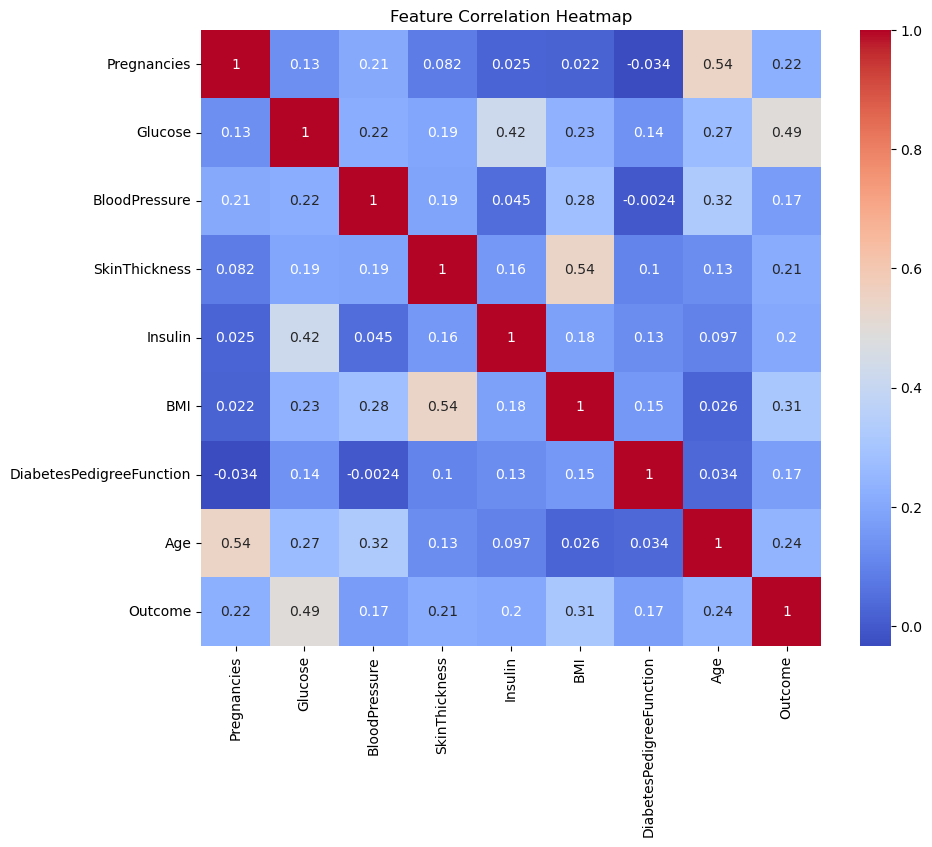

In [15]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [16]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [17]:
from sklearn.preprocessing import StandardScaler


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
import numpy as np

np.mean(X_scaled, axis=0)
np.std(X_scaled, axis=0)


array([1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
#X_train.shape, X_test.shape


In [22]:
from sklearn.linear_model import LogisticRegression


In [23]:
model = LogisticRegression()


In [24]:
model.fit(X_train, y_train)


LogisticRegression()

In [25]:
y_pred = model.predict(X_test)


In [26]:
y_pred[:10], y_test[:10].values


(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [28]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7532467532467533

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[82, 17],
       [21, 34]])

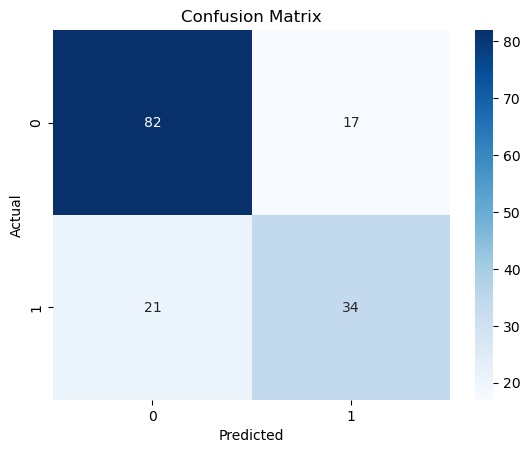

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [31]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [32]:
from sklearn.ensemble import RandomForestClassifier


In [33]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)



In [34]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [35]:
rf_pred = rf_model.predict(X_test)


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_accuracy


0.7402597402597403

In [37]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


Glucose                     0.263453
BMI                         0.164118
Age                         0.134927
DiabetesPedigreeFunction    0.121819
Insulin                     0.089248
BloodPressure               0.084062
SkinThickness               0.072432
Pregnancies                 0.069942
dtype: float64

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [39]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])


In [40]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [41]:
pipeline_pred = pipeline.predict(X_test)


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pipeline_pred))


              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [43]:
import joblib

joblib.dump(pipeline, "../models/diabetes_pipeline.pkl")


['../models/diabetes_pipeline.pkl']